## **Manipulasi Data**

In [2]:
import numpy as np
import pandas as pd
import random

# Set seed untuk reproduktibilitas
np.random.seed(42)
random.seed(42)

# Generate dataset baru
def generate_social_ads_dataset(num_samples=400):
    data = []

    for i in range(num_samples):
        # Generate User ID (8 digit)
        user_id = random.randint(10000000, 99999999)

        # Generate Gender
        gender = random.choice(['Male', 'Female'])

        # Generate Age (distribusi normal dengan mean 37 dan std 10)
        age = int(np.random.normal(37, 10))
        age = max(18, min(age, 60))  # Batasi antara 18-60

        # Generate Salary (distribusi normal dengan mean 70k dan std 30k)
        salary = int(np.random.normal(70000, 30000))
        salary = max(15000, min(salary, 150000))  # Batasi antara 15k-150k

        # Generate Purchased (berdasarkan probabilitas usia dan gaji)
        purchase_prob = 1 / (1 + np.exp(-(0.05 * (age - 40) + 0.00002 * (salary - 70000))))
        purchased = 1 if random.random() < purchase_prob else 0

        data.append([user_id, gender, age, salary, purchased])

    return pd.DataFrame(data, columns=['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'])

# Generate dataset baru
new_dataset = generate_social_ads_dataset()

# Simpan ke file CSV
new_dataset.to_csv('Manipulasi_kaka_Social_Network_Ads.csv', index=False)

# Tampilkan preview
print("Preview Dataset Baru:")
print(new_dataset.head())
print(f"\nTotal Data: {len(new_dataset)}")
print("Distribusi Purchased:")
print(new_dataset['Purchased'].value_counts(normalize=True))

Preview Dataset Baru:
    User ID Gender  Age  EstimatedSalary  Purchased
0  95822412   Male   41            65852          1
1  46913810   Male   43           115690          1
2  23756669   Male   34            62975          0
3  14265799   Male   52            93023          1
4  41227216   Male   32            86276          0

Total Data: 400
Distribusi Purchased:
Purchased
0    0.555
1    0.445
Name: proportion, dtype: float64


In [3]:
from google.colab import files
files.download('Manipulasi_kaka_Social_Network_Ads.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Saatnya MengKlasifikasi**

In [4]:
# 1. Import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# 2. Import Dataset
from google.colab import drive
drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/My Drive/Latihan/Manipulasi_kaka_Social_Network_Ads.csv')
x = dataset.iloc[:, [2, 3]].values  # Mengambil kolom Age (2) dan EstimatedSalary (3)
y = dataset.iloc[:, -1].values      # Mengambil kolom terakhir (Purchased)

Mounted at /content/drive


In [7]:
# 3. Split Dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.25,   # 25% data untuk testing
    random_state=0     # Seed untuk reproduktibilitas
)

In [8]:
# 4. Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)  # Fit dan transform data training
x_test = sc.transform(x_test)        # Transform data testing (HANYA transform)

In [9]:
# 5. Membuat Model Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()            # Inisialisasi classifier
classifier.fit(x_train, y_train)     # Training model

GaussianNB()

In [10]:
# 6. Prediksi
y_pred = classifier.predict(x_test)   # Memprediksi data testing

In [11]:
# 7. Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[48 16]
 [19 17]]


<ipython-input-12-5430dd8bccf4>:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


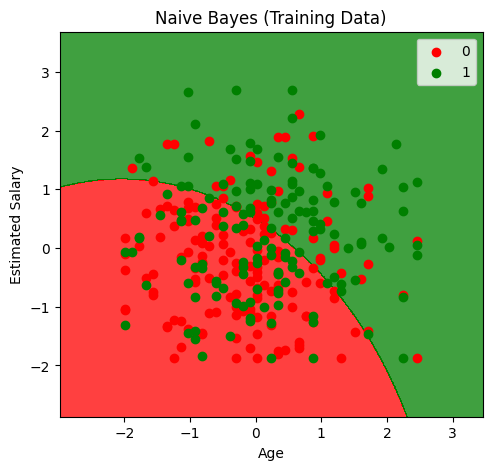

In [12]:
# 8. Visualisasi Data Training
from matplotlib.colors import ListedColormap
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # Subplot kiri untuk training
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01)
)
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Naive Bayes (Training Data)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

<ipython-input-13-752a026350f8>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


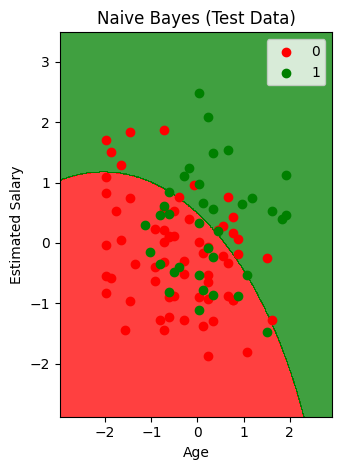

In [13]:
# 9. Visualisasi Data Testing
plt.subplot(1, 2, 2)  # Subplot kanan untuk testing
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01)
)
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Naive Bayes (Test Data)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.tight_layout()
plt.show()